In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
products = pd.read_csv('products.csv')
order_products = pd.read_csv('order_products__prior.csv')
orders = pd.read_csv('orders.csv')

products = products[['product_name', 'product_id']]
order_products = order_products[['product_id', 'order_id', 'reordered']]
orders = orders[['order_id', 'order_hour_of_day', 'order_dow']]

orders.set_index('order_id', inplace=True)
products.set_index('product_id', inplace=True, drop=False)
products.head()

,product_name,product_id
product_id,,
1,Chocolate Sandwich Cookies,1
2,All-Seasons Salt,2
3,Robust Golden Unsweetened Oolong Tea,3
4,Smart Ones Classic Favorites Mini Rigatoni Wit...,4
5,Green Chile Anytime Sauce,5


In [2]:
products_per_order = order_products['order_id'].value_counts()

In [12]:
days_of_week = []
for day in range(0,7):
    days_of_week.append(day)
days_of_week

[0, 1, 2, 3, 4, 5, 6]

In [13]:
orders_per_day = []
for day in days_of_week:
    is_day = orders['order_dow'] == day
    orders_in_day = orders[is_day]
    orders_per_day.append(orders_in_day.shape[0])
orders_per_day

[600905, 587478, 467260, 436972, 426339, 453368, 448761]

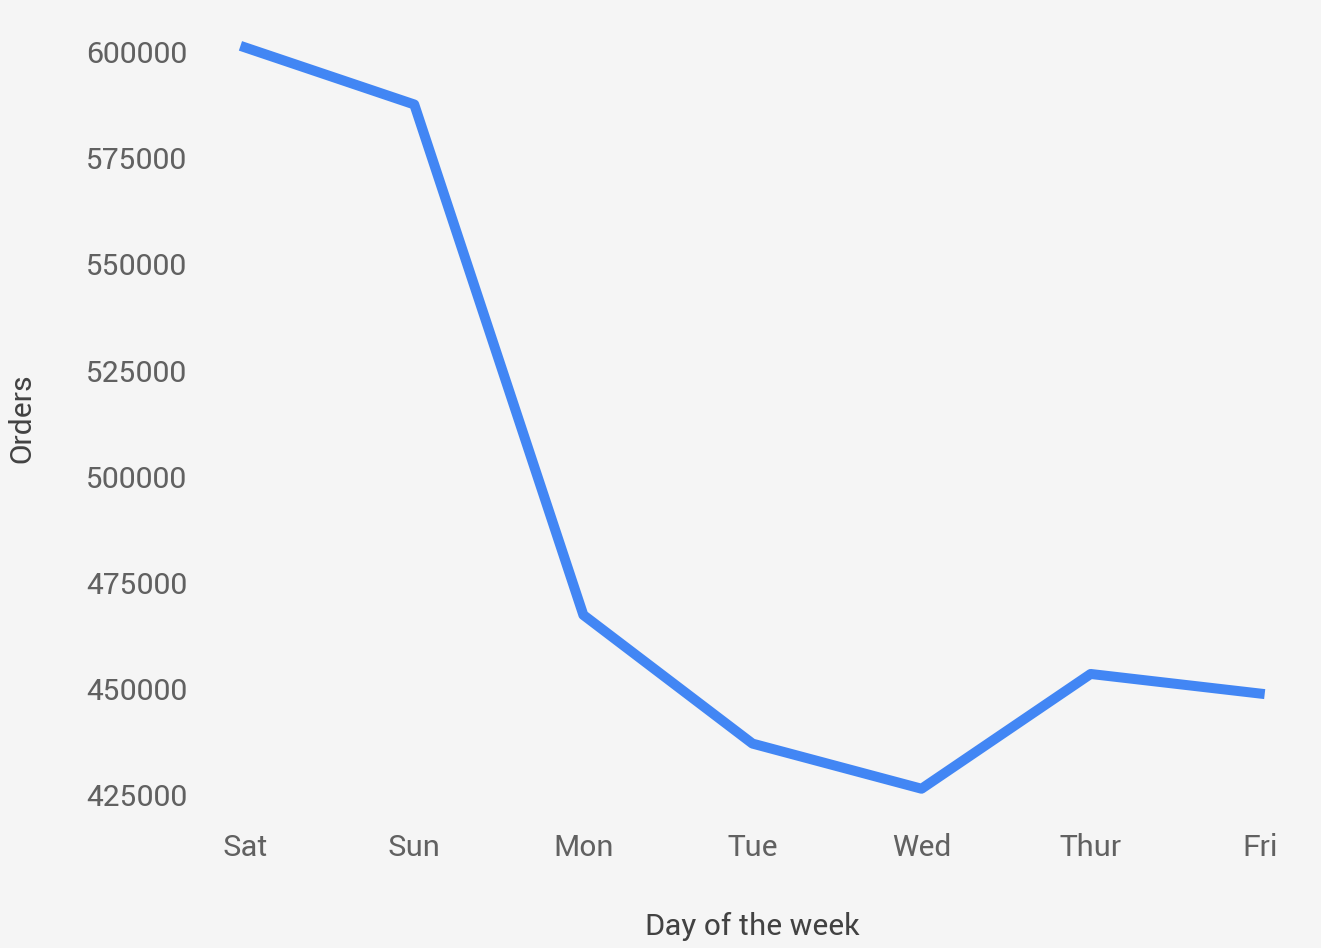

In [33]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,15))
material_blue = (66/255, 134/255, 244/255)
ax.plot(days_of_week, orders_per_day, c=material_blue, linewidth=10)
plt.xlabel('Day of the week', fontsize=30, labelpad=50)
plt.ylabel('Orders', fontsize=30, labelpad=50)
my_xticks = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri']
plt.xticks([0,1,2,3,4,5,6], my_xticks, fontsize=30)
plt.yticks(fontsize=30)
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.xaxis.label.set_color('#424242')
ax.yaxis.label.set_color('#424242')
ax.tick_params(colors='#616161')

ax.set_facecolor('#f5f5f5')
fig.patch.set_facecolor('#f5f5f5')



## Orders at different days of the week

This plot shows the total amount of orders placed per each day of the week

In [15]:
products_per_day = []
counter = 0


for day in days_of_week:
    is_day = orders['order_dow'] == day
    orders_in_day = orders[is_day]
    product_count = 0
    for order_id, order in orders_in_day.iterrows():
        try:
            product_count += products_per_order.loc[order_id]
        except Exception:
            pass
    
    products_per_day.append(product_count)
    
products_per_day

[6209666, 5665856, 4217798, 3844117, 3787215, 4209533, 4500304]

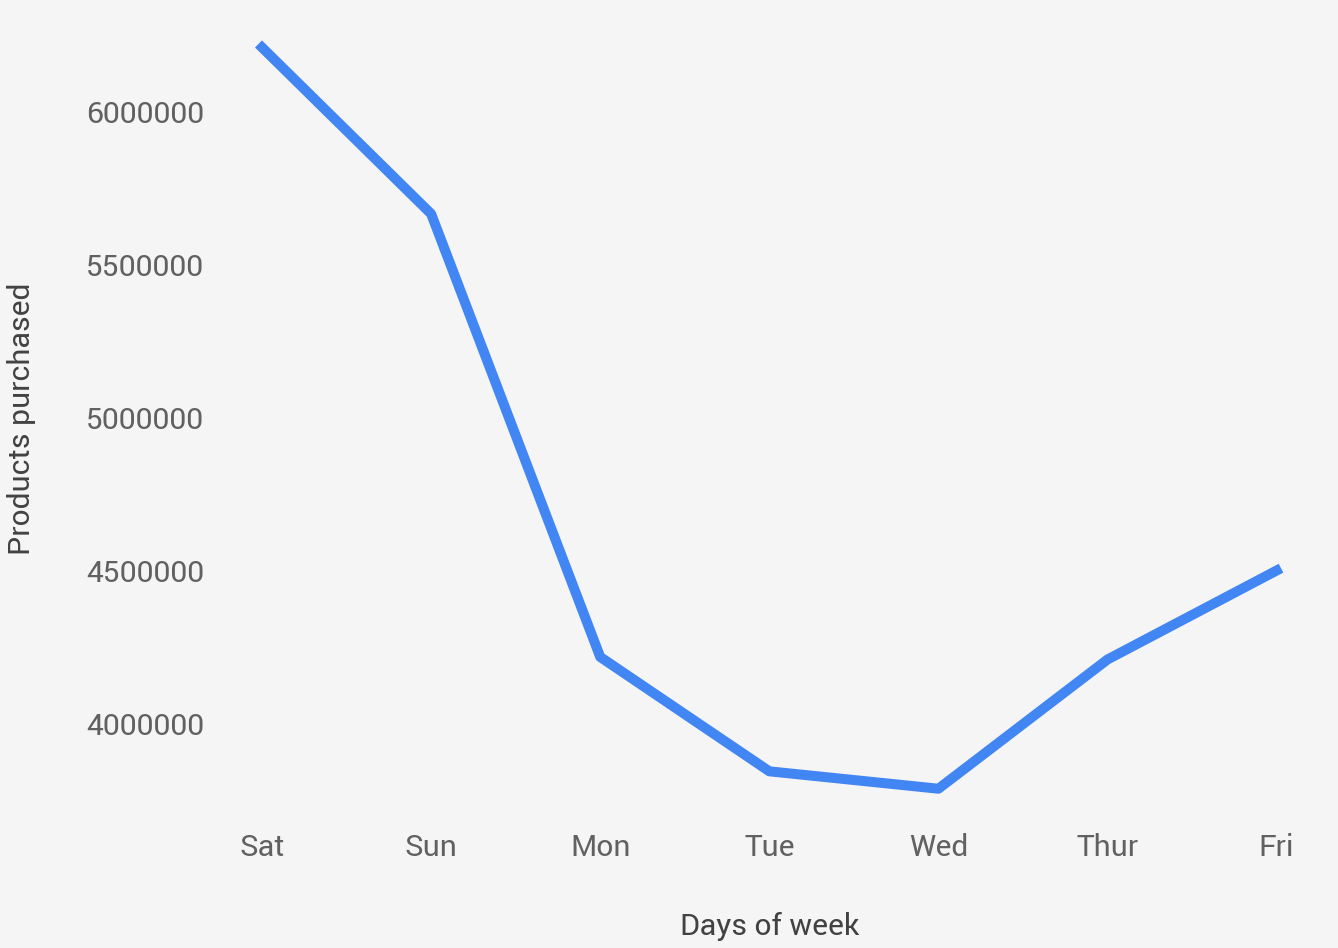

In [32]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,15))
material_blue = (66/255, 134/255, 244/255)
ax.plot(days_of_week, products_per_day, c=material_blue, linewidth=10)
plt.xlabel('Days of week', fontsize=30, labelpad=50)
plt.ylabel('Products purchased', fontsize=30, labelpad=50)
plt.xticks([0,1,2,3,4,5,6], my_xticks, fontsize=30)
plt.yticks(fontsize=30)
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.set_facecolor('#f5f5f5')
fig.patch.set_facecolor('#f5f5f5')
ax.xaxis.label.set_color('#424242')
ax.yaxis.label.set_color('#424242')
ax.tick_params(colors='#616161')

## Number of products purchased per day



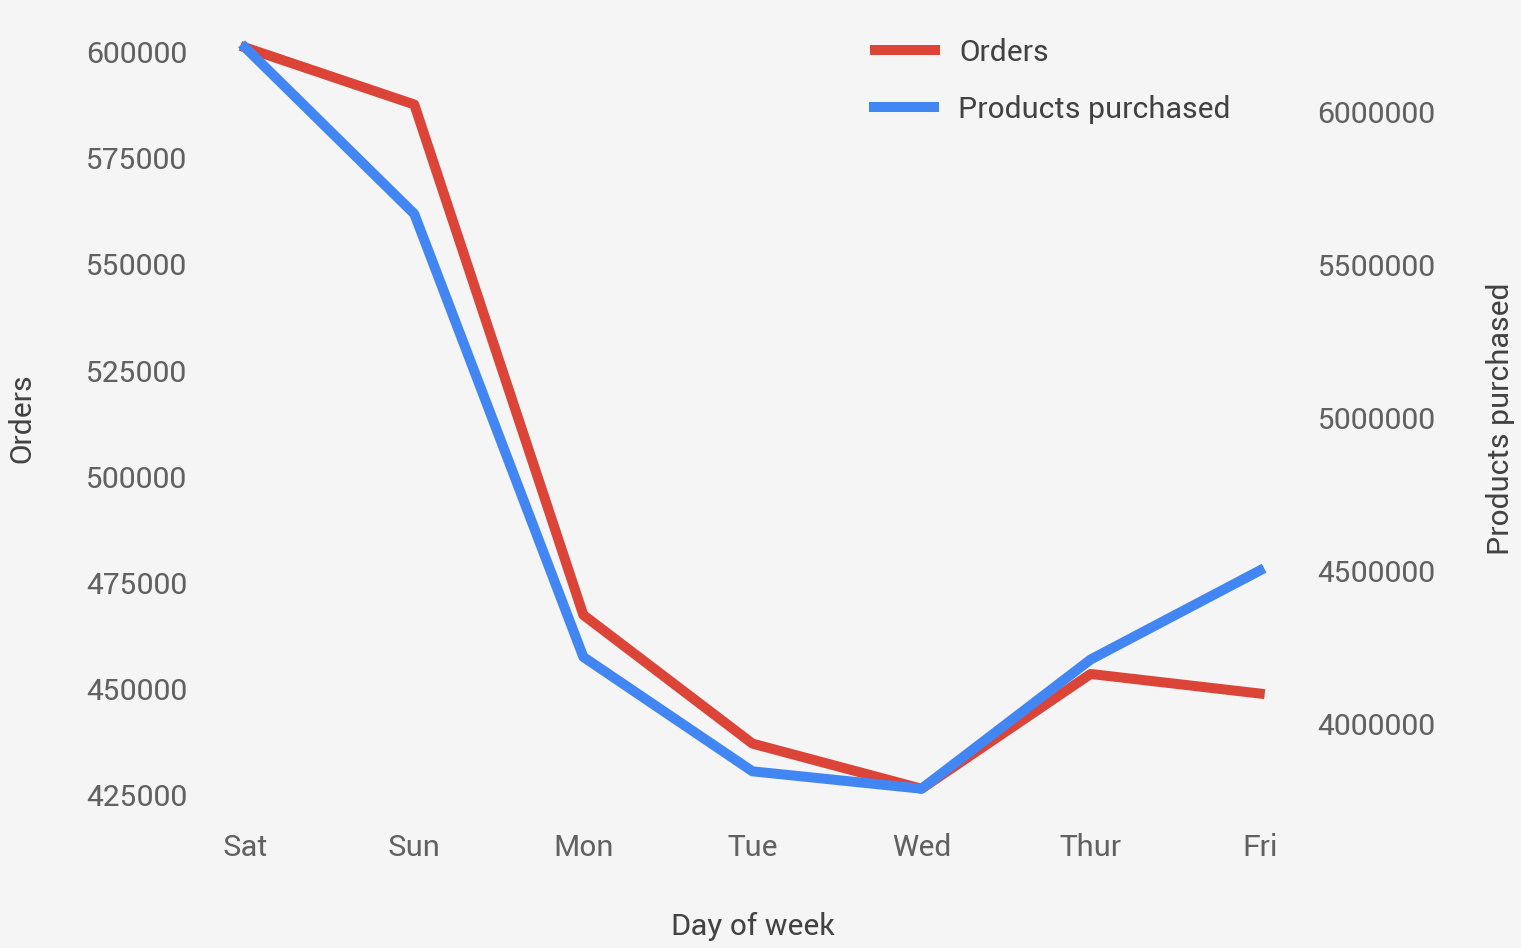

In [160]:
fig, ax1 = plt.subplots(figsize=(20,15))
material_blue = (66/255, 134/255, 244/255)
material_red = '#db4437'


ax1.plot(days_of_week, orders_per_day, c=material_red, linewidth=10, label="Orders")
ax1.set_ylabel('Orders', fontsize=30, labelpad=50)
ax1.set_xlabel('Day of week', fontsize=30, labelpad=50)
for label in ax1.xaxis.get_majorticklabels():
    label.set_fontsize(30)
    label.set_color('#616161')
for label in ax1.yaxis.get_majorticklabels():
    label.set_fontsize(30)
    label.set_color('#616161')




ax2 = ax1.twinx()
ax2.plot(days_of_week, products_per_day, c=material_blue, linewidth=10, label="Products purchased")
ax2.set_ylabel('Products purchased', fontsize=30, labelpad=50)
for label in ax2.yaxis.get_majorticklabels():
    label.set_fontsize(30)
    label.set_color('#616161')



plt.xticks([0,1,2,3,4,5,6], my_xticks, fontsize=30)
#plt.xlabel('Day of week', fontsize=30, labelpad=50)
#plt.yticks(fontsize=30)
ax1.spines["right"].set_visible(False)    
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)    
ax1.spines["bottom"].set_visible(False)
ax2.spines["right"].set_visible(False)    
ax2.spines["left"].set_visible(False)
ax2.spines["top"].set_visible(False)    
ax2.spines["bottom"].set_visible(False)
ax1.tick_params(bottom="off", top="off", left="off", right="off")
ax2.tick_params(bottom="off", top="off", left="off", right="off")
ax1.xaxis.label.set_color('#424242')
ax1.yaxis.label.set_color('#424242')
ax2.xaxis.label.set_color('#424242')
ax2.yaxis.label.set_color('#424242')

ax1.set_facecolor('#f5f5f5')
ax2.set_facecolor('#f5f5f5')
fig.patch.set_facecolor('#f5f5f5')


legend1 = ax1.legend(loc='upper right', bbox_to_anchor=(0.79, 1), fontsize=30)
legend2 = ax2.legend(loc='best', bbox_to_anchor=(.953, 0.93), fontsize=30)
for text in legend1.get_texts():
    text.set_color('#424242')
frame1 = legend1.get_frame()
frame1.set_facecolor('#f5f5f5')
frame1.set_edgecolor('#f5f5f5')
for text in legend2.get_texts():
    text.set_color('#424242')
frame2 = legend2.get_frame()
frame2.set_facecolor('#f5f5f5')
frame2.set_edgecolor('#f5f5f5')



In [233]:
cookie_id = []
cereal_id = []
ice_cream_id = []
coffee_id = []
apple_id = []
broccoli_id = []
cake_id = []
yogurt_id = []
lettuce_id = []
chocolate_id = []
doritos_id = []
pizza_id = []
for index, product in products.iterrows():
    if re.search('[Cc]ookie', product['product_name']) is not None:
        cookie_id.append(products['product_id'].loc[index])
    if re.search('[Cc]ereal', product['product_name']) is not None:
        cereal_id.append(products['product_id'].loc[index])
    if re.search('[Ii]ce [Cc]ream', product['product_name']) is not None:
        ice_cream_id.append(products['product_id'].loc[index])
    if re.search('[Cc]offee', product['product_name']) is not None:
        coffee_id.append(products['product_id'].loc[index])
    if re.search('[Aa]pple', product['product_name']) is not None:
        apple_id.append(products['product_id'].loc[index])
    if re.search('[Bb]roccoli', product['product_name']) is not None:
        broccoli_id.append(products['product_id'].loc[index])
    if re.search('[Cc]ake', product['product_name']) is not None:
        cake_id.append(products['product_id'].loc[index])
    if re.search('[Yy]ogurt|[Yy]oghurt', product['product_name']) is not None:
        yogurt_id.append(products['product_id'].loc[index])
    if re.search('[Ll]ettuce', product['product_name']) is not None:
        lettuce_id.append(products['product_id'].loc[index])
    if re.search('[Cc]hocolate', product['product_name']) is not None:
        chocolate_id.append(products['product_id'].loc[index])
    if re.search('[Dd]oritos', product['product_name']) is not None:
        doritos_id.append(products['product_id'].loc[index])
    if re.search('[Pp]izza', product['product_name']) is not None:
        pizza_id.append(products['product_id'].loc[index])
    
    

In [165]:
def days_from_id(prod_id_list):
    days = []
    for prod in prod_id_list:
        is_prod_id = order_products['product_id'] == prod
        order_id = order_products[is_prod_id]
        
        for order in order_id['order_id']:
            day_of_week = orders['order_dow'].loc[order]
            days.append(day_of_week)
            

    return days

In [167]:
cookie_days = days_from_id(cookie_id)
cereal_days = days_from_id(cereal_id)
coffee_days = days_from_id(coffee_id)
apple_days = days_from_id(apple_id)
broccoli_days = days_from_id(broccoli_id)
ice_cream_days = days_from_id(ice_cream_id)
cake_days = days_from_id(cake_id)
yogurt_days = days_from_id(yogurt_id)

In [215]:
chocolate_days = days_from_id(chocolate_id)
lettuce_days = days_from_id(lettuce_id)
doritos_days = days_from_id(doritos_id)

In [234]:
pizza_days = days_from_id(pizza_id)

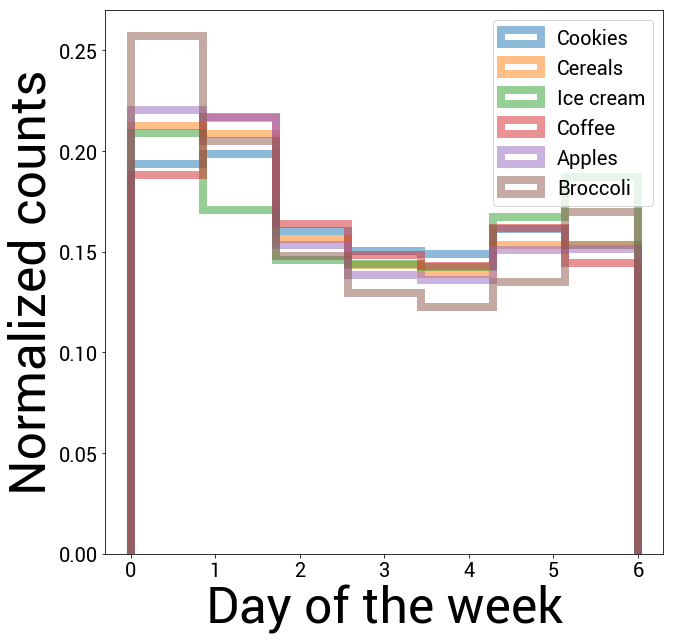

In [196]:
plt.hist(cookie_days, bins = 7, alpha = 0.5, normed=True, label = 'Cookies', histtype = 'step', linewidth = 8)
plt.hist(cereal_days, bins = 7, alpha = 0.5, normed=True, label = 'Cereals', histtype = 'step', linewidth = 8)
plt.hist(ice_cream_days, bins = 7, alpha = 0.5, normed=True, label = 'Ice cream', histtype = 'step', linewidth = 8)
plt.hist(coffee_days, bins = 7, alpha = 0.5, normed=True, label = 'Coffee', histtype = 'step', linewidth = 8)
plt.hist(apple_days, bins = 7, alpha = 0.5, normed=True, label = 'Apples', histtype = 'step', linewidth = 8)
plt.hist(broccoli_days, bins = 7, alpha = 0.5, normed=True, label = 'Broccoli', histtype = 'step', linewidth = 8)

plt.ylabel('Normalized counts', fontsize = 50)
plt.yticks(fontsize = 20)
plt.xlabel('Day of the week', fontsize = 50)
plt.xticks(fontsize = 20)
plt.legend(loc = 'upper right', fontsize = 20)
plt.rcParams['figure.figsize'] = [10, 20]
plt.show()

In [171]:
from itertools import groupby

def percent_purchases_per_day(days_list):
    sorted_list = sorted(days_list)
    days_frequency = [len(list(group)) for key, group in groupby(sorted_list)]
    percent_of_total = []
    for i, count in enumerate(days_frequency):
        percent_of_total.append(count / products_per_day[i])
    return percent_of_total

def norm(input_list):
    normed_list = []
    for i in input_list:
        normed = (i - min(input_list)) / (max(input_list) - min(input_list))
        normed_list.append(normed)
    return normed_list

In [172]:
percent_cookies_per_day = norm(percent_purchases_per_day(cookie_days))
percent_cereal_per_day = norm(percent_purchases_per_day(cereal_days))
percent_coffee_per_day = norm(percent_purchases_per_day(coffee_days))
percent_apple_per_day = norm(percent_purchases_per_day(apple_days))
percent_broccoli_per_day = norm(percent_purchases_per_day(broccoli_days))
percent_ice_cream_per_day = norm(percent_purchases_per_day(ice_cream_days))

In [191]:
percent_cake_per_day = norm(percent_purchases_per_day(cake_days))
percent_yogurt_per_day= norm(percent_purchases_per_day(yogurt_days))

In [216]:
percent_chocolate_per_day = norm(percent_purchases_per_day(chocolate_days))
percent_lettuce_per_day = norm(percent_purchases_per_day(lettuce_days))
percent_doritos_per_day = norm(percent_purchases_per_day(doritos_days))

In [235]:
percent_pizza_per_day = norm(percent_purchases_per_day(pizza_days))

In [168]:
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
# For sans-serif
from matplotlib import rc
rc("font", **{"sans-serif": ["Roboto"]})

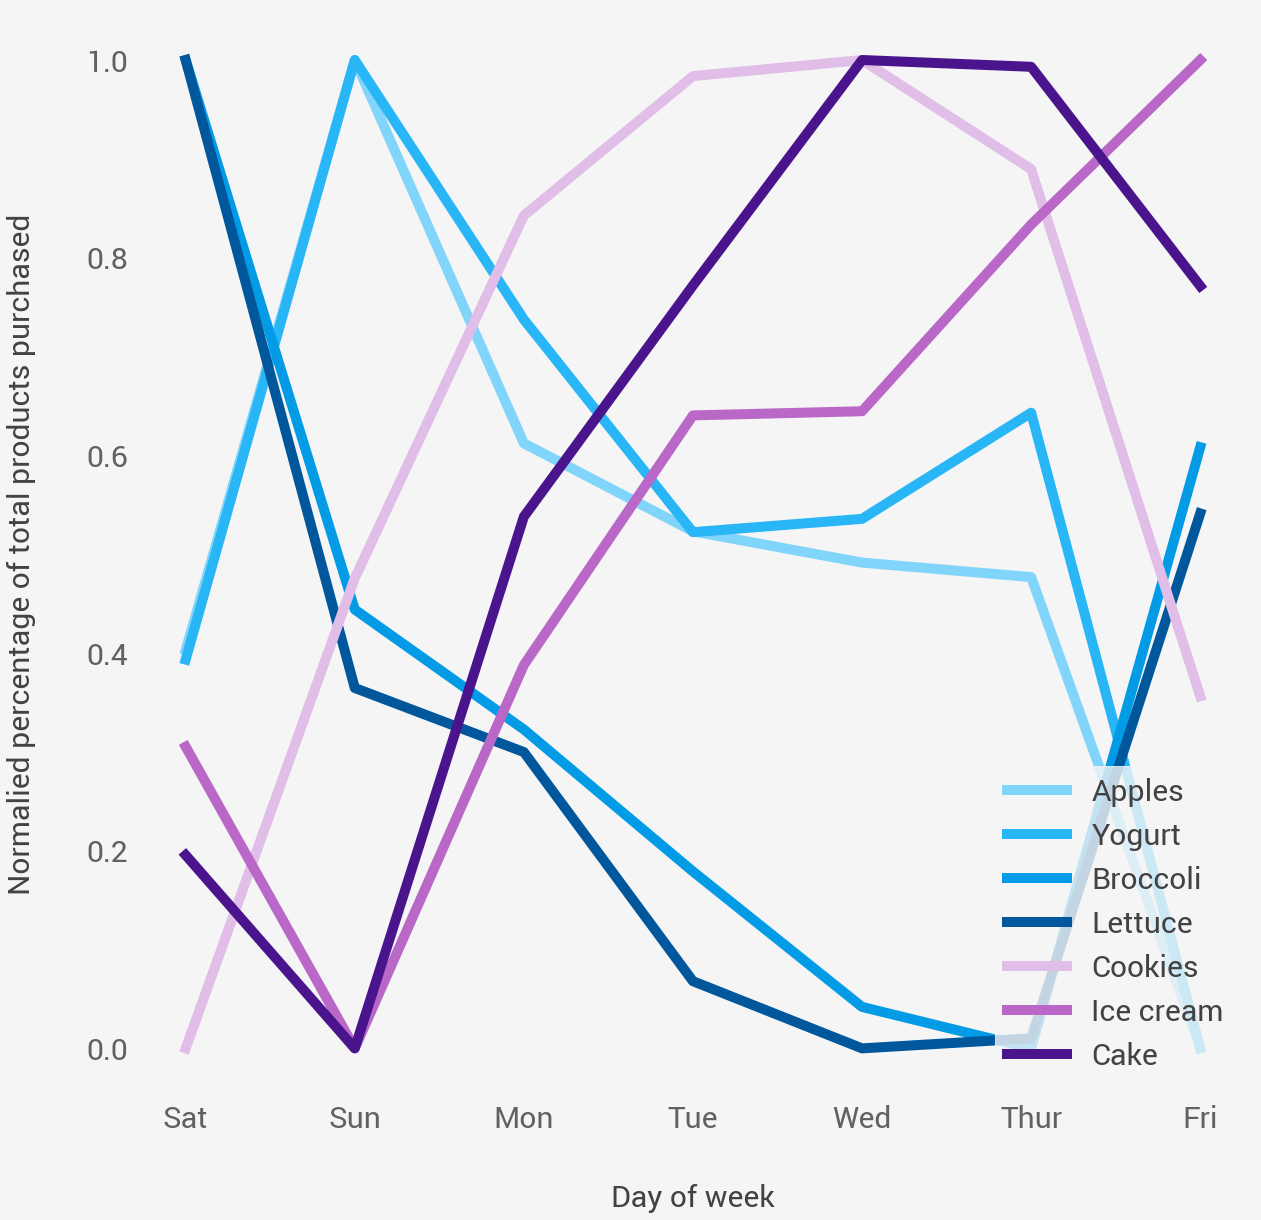

In [245]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel('Day of week', fontsize=30, labelpad=50)
plt.ylabel('Normalied percentage of total products purchased', fontsize=30, labelpad=50)
ax.xaxis.label.set_color('#424242')
ax.yaxis.label.set_color('#424242')
ax.tick_params(colors='#616161')
plt.xticks([0,1,2,3,4,5,6], my_xticks, fontsize=30)
plt.yticks(fontsize=30)
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
plt.tick_params(bottom="off", top="off", left="off", right="off")
foods_per_day = [percent_apple_per_day, percent_yogurt_per_day, percent_broccoli_per_day, percent_lettuce_per_day, percent_cookies_per_day, percent_ice_cream_per_day, percent_cake_per_day]
lables = ['Apples', 'Yogurt', 'Broccoli', 'Lettuce', 'Cookies', 'Ice cream',  'Cake']
colors = ['#81d4fa', '#29b6f6', '#039be5', '#01579b', '#e1bee7', '#ba68c8', '#4a148c']
for i, food in enumerate(foods_per_day):
    plt.plot(days_of_week, food, linewidth=10, label=lables[i], c=colors[i])

legend = plt.legend(loc='lower right', fontsize=30)

for text in legend.get_texts():
    text.set_color('#424242')
    
ax.set_facecolor('#f5f5f5')
fig.patch.set_facecolor('#f5f5f5')
frame = legend.get_frame()
frame.set_facecolor('#f5f5f5')
frame.set_edgecolor('#f5f5f5')

plt.show()
    


## Percentage of total products purchased each day of the week
